1. Логистическая регрессия

Линейная модель для классификации. Строит гиперплоскость w·x+b и прогоняет результат через логистическую (sigmoid) функцию, чтобы получить вероятность класса. Подходит, когда нужна интерпретируемость (коэффициенты w показывают вклад признаков) и линейное разделение примерно работает.

2. Дерево решений

Дерево принятия решений (также называют деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.

Рекурсивно делит признаковое пространство на прямоугольные области (вопросы вида «feature ≤ threshold?»). Листья содержат прогноз (класс или среднее). Легко интерпретировать («если alcohol > 11.5 и volatile acidity < 0.3 → good»), но склонно к переобучению при большой глубине.


In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True, as_frame=True)

In [ ]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

Обучаем 3 модели разной «ёмкости»

a) Линейная (маленькая)

b) DecisionTree с max_depth=3 (средняя)

c) DecisionTree без ограничений (большая)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    'LogReg': LogisticRegression(max_iter=10000),
    'Tree3': DecisionTreeClassifier(max_depth=3, random_state=42),
    'TreeNone': DecisionTreeClassifier(random_state=42)
}

In [ ]:
import numpy as np
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc  = accuracy_score(y_test,  model.predict(X_test))
    results.append((name, train_acc, test_acc))

In [ ]:
results

[('LogReg', 0.9929577464788732, 0.9444444444444444),
 ('Tree3', 0.9929577464788732, 0.9444444444444444),
 ('TreeNone', 1.0, 0.9444444444444444)]

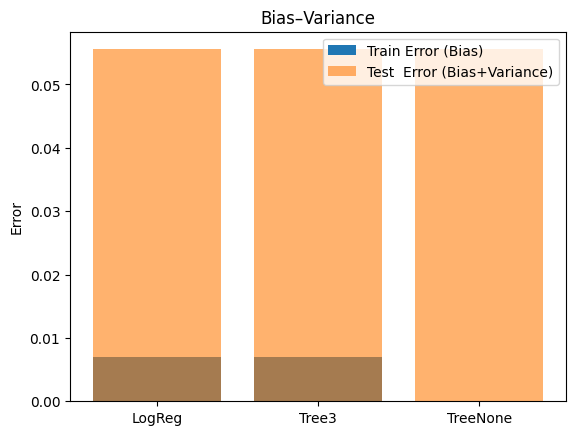

In [ ]:
import matplotlib.pyplot as plt
labels, train_scores, test_scores = zip(*results)
x = np.arange(len(labels))
plt.bar(x, 1 - np.array(train_scores), label='Train Error (Bias)')
plt.bar(x, 1 - np.array(test_scores),  label='Test  Error (Bias+Variance)', alpha=0.6)
plt.xticks(x, labels); plt.ylabel('Error'); plt.legend(); plt.title('Bias–Variance');

Bias — это систематическая ошибка модели: насколько «средняя» модель отклоняется от истинной зависимости. Высокий bias = недообучение.
Variance — это чувствительность модели к конкретной выборке: насколько предсказания различаются между разными выборками. Высокий variance = переобучение.
На практике смотрю: если train- и test-ошибки обе большие — повышаю сложность (уменьшаю bias); если train-ошибка мала, а test-ошибка большая — добавляю регуляризацию или больше данных (уменьшаю variance).

1. Bias как смещение модели (underfitting)

– это ошибка, которую мы обсуждали выше.

– Меряется на всём наборе возможных выборок и показывает, «насколько средняя модель ошибается».

2. Bias как параметр b в y = w·x + b

– это просто свободный член (intercept), одна из обучаемых весов модели.

– Он не характеризует качество модели, а лишь сдвигает гиперплоскость.
На собеседовании можно уточнить:
«Если речь о переобучении, то bias = систематическая ошибка. Если речь о параметрах, то bias — это intercept в линейной модели; это разные вещи, хотя слово одно.»

Построить логистическую регрессию

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


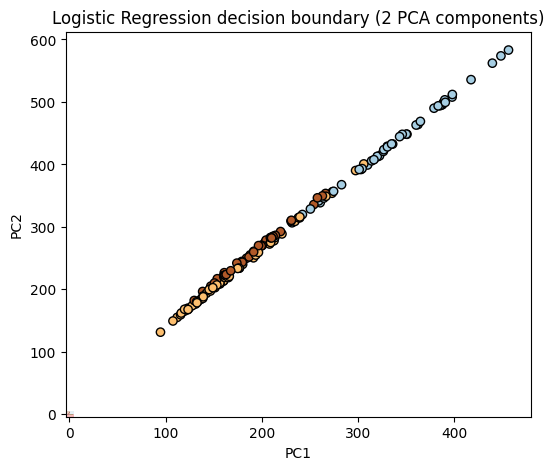

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# 1) полный пайплайн 13 → 2 → классификатор
full_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca',    PCA(n_components=2)),
    ('clf',    LogisticRegression(max_iter=1000))
])

full_pipe.fit(X_train, y_train)

# 2) извлекаем объект PCA и классификатор
pca   = full_pipe.named_steps['pca']
clf_2d = full_pipe.named_steps['clf']

# 3) строим сетку в 2-D PCA-пространстве
mesh = np.linspace(-4, 4, 200)
xx, yy = np.meshgrid(mesh, mesh)
mesh_2d = np.c_[xx.ravel(), yy.ravel()]

# 4) предсказываем уже в 2-D
Z = clf_2d.predict(mesh_2d).reshape(xx.shape)

# 5) рисуем
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(*pca.transform(X_train).T, c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Logistic Regression decision boundary (2 PCA components)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


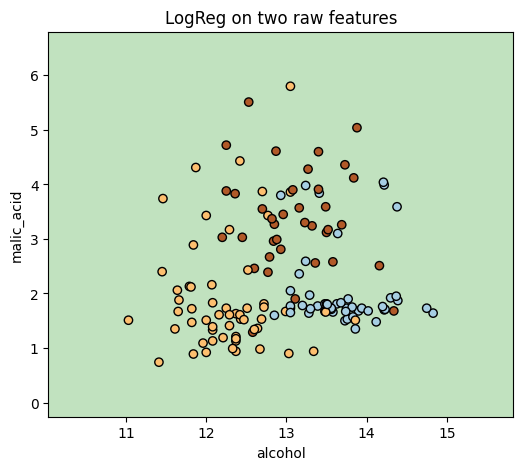

In [ ]:
feat1, feat2 = 'alcohol', 'malic_acid'
X_pair = X_train[[feat1, feat2]]
pipe_pair = make_pipeline(StandardScaler(),
                          LogisticRegression(max_iter=1000))
pipe_pair.fit(X_pair, y_train)

# сетка
x_min, x_max = X_pair[feat1].min()-1, X_pair[feat1].max()+1
y_min, y_max = X_pair[feat2].min()-1, X_pair[feat2].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = pipe_pair.predict(StandardScaler().fit_transform(grid)).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_pair[feat1], X_pair[feat2], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feat1); plt.ylabel(feat2); plt.title("LogReg on two raw features")
plt.show()

Построить дерево решений

In [ ]:
from sklearn.tree import export_text
tree_small = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_small.fit(X_train, y_train)
print(export_text(tree_small, feature_names=list(X.columns)))

|--- color_intensity <= 3.82
|   |--- ash <= 3.00
|   |   |--- od280/od315_of_diluted_wines <= 3.73
|   |   |   |--- class: 1
|   |   |--- od280/od315_of_diluted_wines >  3.73
|   |   |   |--- class: 0
|   |--- ash >  3.00
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.58
|   |   |--- alcalinity_of_ash <= 17.65
|   |   |   |--- class: 1
|   |   |--- alcalinity_of_ash >  17.65
|   |   |   |--- class: 2
|   |--- flavanoids >  1.58
|   |   |--- proline <= 724.50
|   |   |   |--- class: 1
|   |   |--- proline >  724.50
|   |   |   |--- class: 0

